# Semi quantative immunohistochemistry
## The interactive notebook version of my script that processes microsocpy data


This script will make a DataFrame from all the .xlxs files in the given directory and make the plots with the desired filters.

Dependencies:

Pandas, Matplotlib, Numpy, Scipy, Pingouin (conda install -c conda-forge pingouin), pip install SciencePlots (Matplotlib style)

Using the line plot tool form imageJ and the send to excel plugin, we can make
an excel file that contains the data from the plot profile tool. There is one
excel file per .lif file, containing the data from all the images in that .lif.
You may choose the regions, genotype and the sex that appear in the plot, so
long as you know the naming scheme used when naming the images acquired during the microscopy

## Setup some directories to store the graphs and data :

In [7]:
new_dir = 'Data_and_Plots'+'\\'
try:
    os.makedirs(new_dir)
except OSError:
    print ('Failed to make directory :', new_dir, ' to store the results. It may already exist\n')
else:
    print('Made directory :', new_dir, ' to store the results\n')

Failed to make directory : Data_and_Plots\  to store the results. It may already exist



## Importing and data processing functions :


In [6]:
from Plot_All_PDF import *

## Load and remove the redundent columns
bins has the distances merged together into 0.5 um bins, no bins doesnt

df_std_long is in long format, but only containes the maximum intensity value (standard score)

In [34]:
all_data = make_big_DataFrame("./", 0)

merged_bins = merge_on_distance(all_data, 0, True)
merged_no_bins = merge_on_distance(all_data, 0, False)

regions = ['DorCX','Thal', 'Hypo', 'SCN'] # these are hardcoded into the main script

df_std_long = make_std_long(merged_no_bins, 0, "./", 0, False)

## How many blood vessels we have and where from :

In [ ]:
df_std_long_counts_region = df_std_long.value_counts(subset=['sex', 'genotype', 'timepoint', 'region'], sort=False)
df_std_long_counts_region.loc["Total"] = df_std_long_counts_region.sum()
df_std_long_counts_region

# We can now start plotting

## Some examples using the long data format


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import math

from all_functions import *

# Figure parameters
n_rows = 2
n_cols = 2
figsize = (10,8)
title_font_size = 20
plt.style.use(['science','grid'])

In [ ]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df_std_long, x='genotype', hue='timepoint', y='intensity', split=True, inner='quartile', palette=({'ZT18':'r', 'ZT6':'g'}))

## Lets now work with the Nedergaard data set :

In [ ]:
# Import data
fig3b_day = pd.read_csv('Nedergaard/fig3b_day.csv', sep='\t', header=None)
fig3b_night = pd.read_csv('Nedergaard/fig3b_night.csv', sep='\t', header=None)

# Mean
fig3b_day['Mean'] = fig3b_day.iloc[:,1:].mean(axis=1) 
fig3b_night['Mean'] = fig3b_night.mean(axis=1)

# Return unbiased standard error of the mean 
fig3b_day['SEM'] = fig3b_day.iloc[:,1:-1].sem(axis=1) 
fig3b_night['SEM'] = fig3b_night.iloc[:,:-1].sem(axis=1)

plt.figure()
# Font
plt.rcParams["figure.figsize"] = (7,7)
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 20,
    }

# Plot

#fig3b_day.plot(x=0, y=np.arange(1, len(fig3b_day.columns), 20).tolist())
plt.plot(fig3b_day[0], fig3b_day['Mean'], 'r', label='Mean day')
plt.plot(fig3b_day[0],fig3b_night['Mean'], 'b', label='Mean night')

# Shade the SEM
plt.fill_between(fig3b_day[0], fig3b_day['Mean'] - fig3b_day['SEM'], fig3b_day['Mean'] + fig3b_day['SEM'], color='r', alpha=0.35)
plt.fill_between(fig3b_day[0], fig3b_night['Mean'] - fig3b_night['SEM'], fig3b_night['Mean'] + fig3b_night['SEM'], color='b', alpha=0.35)

# Labels
plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)
plt.ylabel('Intensity (A.U)', fontdict=font, labelpad=None)
plt.title('Average intensity of AQP4 staining', fontdict=font, fontsize=25)
plt.legend(fontsize=15)

plt.savefig('Nedergaard/fig3b.pdf')
plt.show()
#plt.close()

### Now we subtract the background

C:\Users\ParkerD\.conda\envs\david\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:39: DeprecationWarning: invalid escape sequence \m
<>:39: DeprecationWarning: invalid escape sequence \m
<ipython-input-82-4803eaa5f5bb>:39: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)


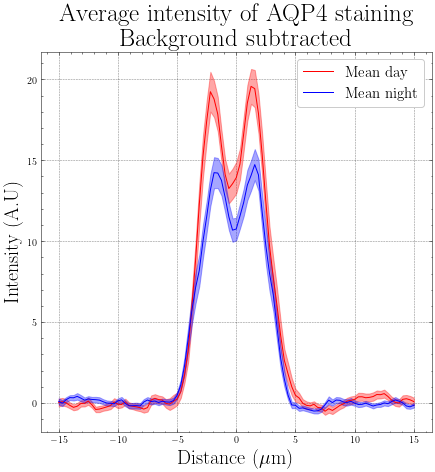

In [82]:
# Import data
fig3b_day = pd.read_csv('Nedergaard/fig3b_day.csv', sep='\t', header=None)
fig3b_night = pd.read_csv('Nedergaard/fig3b_night.csv', sep='\t', header=None)

def substract_background(col):
	return col - np.mean(col[list(list(range(0,round(len(col)*1/3))) + list(range(round(len(col)*2/3), len(col))))])

fig3b_day.iloc[:,1:] = fig3b_day.iloc[:,1:].apply(substract_background)
fig3b_night.iloc[:,1:] = fig3b_night.iloc[:,1:].apply(substract_background)

# Mean
fig3b_day['Mean'] = fig3b_day.iloc[:,1:].mean(axis=1) 
fig3b_night['Mean'] = fig3b_night.mean(axis=1)

# Return unbiased standard error of the mean 
fig3b_day['SEM'] = fig3b_day.iloc[:,1:-1].sem(axis=1) 
fig3b_night['SEM'] = fig3b_night.iloc[:,:-1].sem(axis=1)

plt.figure()
# Font
plt.rcParams["figure.figsize"] = (7,7)
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 20,
    }

# Plot

#fig3b_day.plot(x=0, y=np.arange(1, len(fig3b_day.columns), 20).tolist())
plt.plot(fig3b_day[0], fig3b_day['Mean'], 'r', label='Mean day')
plt.plot(fig3b_day[0],fig3b_night['Mean'], 'b', label='Mean night')

# Shade the SEM
plt.fill_between(fig3b_day[0], fig3b_day['Mean'] - fig3b_day['SEM'], fig3b_day['Mean'] + fig3b_day['SEM'], color='r', alpha=0.35)
plt.fill_between(fig3b_day[0], fig3b_night['Mean'] - fig3b_night['SEM'], fig3b_night['Mean'] + fig3b_night['SEM'], color='b', alpha=0.35)

# Labels
plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)
plt.ylabel('Intensity (A.U)', fontdict=font, labelpad=None)
plt.title('Average intensity of AQP4 staining\nBackground subtracted', fontdict=font, fontsize=25)
plt.legend(fontsize=15)

plt.savefig('Nedergaard/fig3b_lineplot_background_sub.pdf')
plt.show()
#plt.close()

### And finaly the standard score

C:\Users\ParkerD\.conda\envs\david\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:39: DeprecationWarning: invalid escape sequence \m
<>:39: DeprecationWarning: invalid escape sequence \m
<ipython-input-81-abdf80dbbe2d>:39: DeprecationWarning: invalid escape sequence \m
  plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)


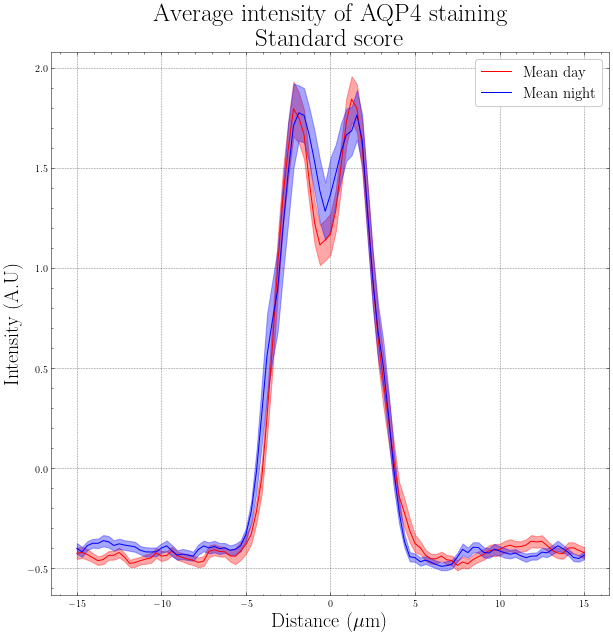

In [81]:
# Import data
fig3b_day = pd.read_csv('Nedergaard/fig3b_day.csv', sep='\t', header=None)
fig3b_night = pd.read_csv('Nedergaard/fig3b_night.csv', sep='\t', header=None)

def standard_score(col):
	return ( col - np.mean(col) ) / np.std(col)

fig3b_day.iloc[:,1:] = fig3b_day.iloc[:,1:].apply(standard_score)
fig3b_night.iloc[:,1:] = fig3b_night.iloc[:,1:].apply(standard_score)

# Mean
fig3b_day['Mean'] = fig3b_day.iloc[:,1:].mean(axis=1) 
fig3b_night['Mean'] = fig3b_night.mean(axis=1)

# Return unbiased standard error of the mean 
fig3b_day['SEM'] = fig3b_day.iloc[:,1:-1].sem(axis=1) 
fig3b_night['SEM'] = fig3b_night.iloc[:,:-1].sem(axis=1)

plt.figure()
# Font
plt.rcParams["figure.figsize"] = (7,7)
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 20,
    }

# Plot

#fig3b_day.plot(x=0, y=np.arange(1, len(fig3b_day.columns), 20).tolist())
plt.plot(fig3b_day[0], fig3b_day['Mean'], 'r', label='Mean day')
plt.plot(fig3b_day[0],fig3b_night['Mean'], 'b', label='Mean night')

# Shade the SEM
plt.fill_between(fig3b_day[0], fig3b_day['Mean'] - fig3b_day['SEM'], fig3b_day['Mean'] + fig3b_day['SEM'], color='r', alpha=0.35)
plt.fill_between(fig3b_day[0], fig3b_night['Mean'] - fig3b_night['SEM'], fig3b_night['Mean'] + fig3b_night['SEM'], color='b', alpha=0.35)

# Labels
plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)
plt.ylabel('Intensity (A.U)', fontdict=font, labelpad=None)
plt.title('Average intensity of AQP4 staining\nStandard score', fontdict=font, fontsize=25)
plt.legend(fontsize=15)

plt.savefig('Nedergaard/fig3b_linplot_std_score.pdf')
plt.show()
#plt.close()

### Now for the box plots with the Nedergaard data

Ttest_indResult(statistic=5.752488500019789, pvalue=1.9597443661842672e-08)


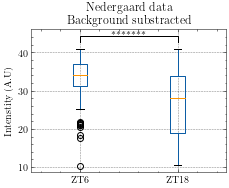

In [18]:
# Import data
fig3b_day = pd.read_csv('Nedergaard/fig3b_day.csv', sep='\t', header=None)
fig3b_night = pd.read_csv('Nedergaard/fig3b_night.csv', sep='\t', header=None)

# Function that subtracts the mean of the 1st and last 3rd from the array and returns the max
def substract_background_max(col):
    return np.max(col - np.mean(col[list(list(range(0,round(len(col)*1/3))) + list(range(round(len(col)*2/3), len(col))))]))

df_box =  pd.DataFrame()

df_box['ZT6'] = fig3b_day.iloc[:,1:].apply(substract_background_max)
df_box['ZT18'] = fig3b_night.iloc[:,1:].apply(substract_background_max)

fig, ax = plt.subplots()

df_box.boxplot()

# T test
region_stats = stats.ttest_ind(df_box['ZT6'].dropna(), df_box['ZT18'].dropna(), axis=0, equal_var=False, nan_policy='raise', alternative='greater')

regions = [1,2,3,4]

# Annotate the boxplots
height = np.max(df_box.max(axis=0))*np.ones(len(regions))
bars = np.arange(len(regions))
barplot_annotate_brackets(1, 2, region_stats.pvalue, bars, height, ax)

ax.set_title('Nedergaard data\nBackground substracted')
ax.set_ylabel('Intenstity (A.U)')
print(region_stats)

plt.savefig('Nedergaard/fig3b_boxplot_background_sub.pdf')


### Nedergaard std score

Ttest_indResult(statistic=-3.305988184014679, pvalue=0.9994369777869339)


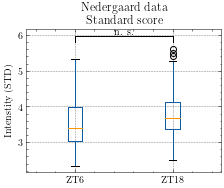

In [19]:
# Import data
fig3b_day = pd.read_csv('Nedergaard/fig3b_day.csv', sep='\t', header=None)
fig3b_night = pd.read_csv('Nedergaard/fig3b_night.csv', sep='\t', header=None)

def standard_score_max(col):
    return np.max(( col - np.mean(col) ) / np.std(col))

df_box =  pd.DataFrame()

df_box['ZT6'] = fig3b_day.iloc[:,1:].apply(standard_score_max)
df_box['ZT18'] = fig3b_night.iloc[:,1:].apply(standard_score_max)

fig, ax = plt.subplots()



# T test
region_stats = stats.ttest_ind(df_box['ZT6'].dropna(), df_box['ZT18'].dropna(), axis=0, equal_var=False, nan_policy='raise', alternative='greater')

df_box.boxplot()

regions = [1,2,3,4]

# Annotate the boxplots
height = np.max(df_box.max(axis=0))*np.ones(len(regions))
bars = np.arange(len(regions))
barplot_annotate_brackets(1, 2, region_stats.pvalue, bars, height, ax)

ax.set_title('Nedergaard data\nStandard score')
ax.set_ylabel('Intenstity (STD)')

print(region_stats)

plt.savefig('Nedergaard/fig3b_boxplot_std_score.pdf')


In [ ]:
df_std_long = make_std_long(merged_no_bins, 0, "./", 0, False)

In [38]:

df_std_long[df_std_long['region'] == 'DorCX'].groupby(["genotype",'sex'])#.boxplot(column=['intensity'], by=["genotype",'sex'], figsize=(10,10))

C:\Users\ParkerD\.conda\envs\david\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
regions

['DorCX', 'Thal', 'Hypo', 'SCN']

In [ ]:
df = df_std_long
verbose = 0

# Set the region column as an index to be able to select data by region
# df.set_index(keys='region', append=True,  inplace=True)

# One subplot comparing sex per region
fig_Box_sex, axes_Box_sex = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
fig_Box_sex.subplots_adjust(top=0.90)
fig_Box_sex.suptitle('Maximum intensity of AQP-4 staining\nStandard Score.', fontsize=title_font_size)

# Old t-test
#Dataframe for storing statistical data
df_box_sex_stats = pd.DataFrame(data=None, index=['statistic', 'pvalue'], columns=regions)

for ax, region in zip(axes_Box_sex.flatten(), regions):
	df.T.swaplevel(axis=1)[region].T.boxplot(column=['intensity'], by=['genotype', 'sex'], ax=ax) #TODO is this the correct data ? check with the raw numbers
	ax.set(title=region, xlabel='Sex', ylabel=('Intensity (STD)'))

	# Statistical analysis
	if verbose > 0: print('\n\tPerforming statistical analysis on the region : ' + region)

	# t-test
	# Get the correct columns
	df_m = df.T.swaplevel(axis=1)[region].T.set_index('sex', append=True).T.swaplevel(axis=1)['m'].T['intensity']
	df_f = df.T.swaplevel(axis=1)[region].T.set_index('sex', append=True).T.swaplevel(axis=1)['f'].T['intensity']

	from scipy import stats
	region_stats = stats.ttest_ind(df_m.dropna(), df_f.dropna(), axis=0, equal_var=False, nan_policy='raise', alternative='two-sided')
	df_box_sex_stats.loc['statistic', region] = region_stats.statistic
	df_box_sex_stats.loc['pvalue', region] = region_stats.pvalue
	if verbose : print('\t',region_stats, '\n') #TODO Make sure the stats and pvalue are the right way around

	# Annotate the boxplots
	height = np.max(df.T.swaplevel(axis=1)[region].T['intensity'].max())*np.ones(len(regions))
	bars = np.arange(len(regions))
	barplot_annotate_brackets(1, 2, region_stats.pvalue, bars, height, ax)

fig_Box_sex.suptitle('Maximum intensity of AQP-4 staining\nStandard Score.', fontsize=title_font_size)
# plt.savefig(path_box + 'Box_Plot_Sex.pdf')
# plt.close()

Example with t-test

C:\Users\ParkerD\.conda\envs\david\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DorCX,Thal,Hypo,SCN
statistic,0.746029,2.385209,1.391769,2.444517
pvalue,0.456772,0.019136,0.167136,0.018439


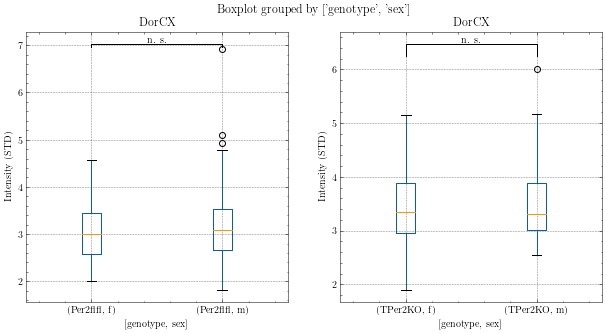

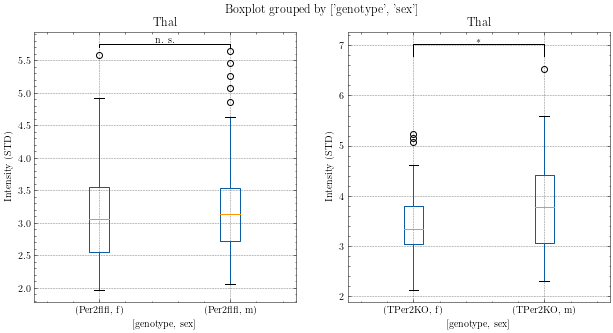

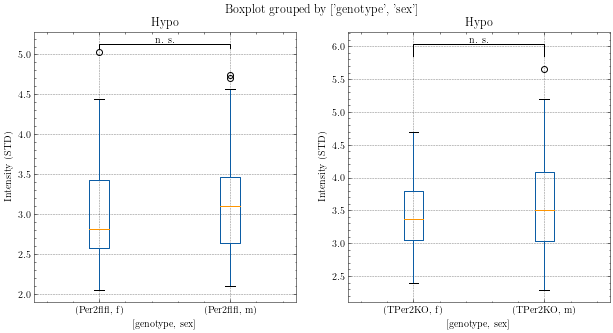

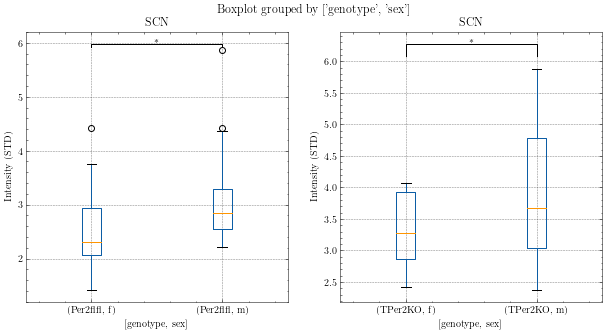

In [76]:
#Dataframe for storing statistical data
df_box_sex_stats = pd.DataFrame(data=None, index=['statistic', 'pvalue'], columns=regions)

for region in regions:
    # Iterate through the regions
    df = df_std_long[df_std_long['region'] == region]    

    # Group the data to your liking
    grouped = df.groupby('genotype')

    # Figure out number of rows needed for 2 column grid plot
    # Also accounts for odd number of plots
    nrows = int(math.ceil(len(grouped)/2.))

    #Setup Subplots
    fig, axs = plt.subplots(nrows,2, figsize=(10,5))
    
    for (name, df), ax in zip(grouped, axs.flat):
        # t-test
        # Get the correct columns
        df_m = df.set_index('sex', append=True).T.swaplevel(axis=1)['m'].T['intensity']
        df_f = df.set_index('sex', append=True).T.swaplevel(axis=1)['f'].T['intensity']

        from scipy import stats
        region_stats = stats.ttest_ind(df_m.dropna(), df_f.dropna(), axis=0, equal_var=False, nan_policy='raise', alternative='two-sided')
        df_box_sex_stats.loc['statistic', region] = region_stats.statistic
        df_box_sex_stats.loc['pvalue', region] = region_stats.pvalue

        # Plot
        df.boxplot(column=['intensity'], by=['genotype', 'sex'], ax=ax)

        # Annotate the boxplots
        height = np.max(df['intensity'].max())*np.ones(len(regions))
        bars = np.arange(len(regions))
        barplot_annotate_brackets(1, 2, region_stats.pvalue, bars, height, ax)

        # Subplot title
        ax.set_title(region)
        ax.set_ylabel('Intensity (STD)')

    plt.savefig('Sex_'+region+'.pdf')

df_box_sex_stats
    